# Analyzing the Ford GoBike System Data
## by Mário Damhur

## Investigation Overview

We will analyzing some features in order to check especially the types of users that have more trips duration.

## Dataset Overview

 - Trip Duration (in seconds)
 - Start Time and Date
 - End Time and Date
 - Start Station ID
 - Start Station Name
 - Start Station Latitude
 - Start Station Longitude
 - End Station ID
 - End Station Name
 - End Station Latitude
 - End Station Longitude
 - Bike ID
 - User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)
 - Member Year of Birth
 - Member Gender

In [32]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

plt.rcParams["figure.figsize"] = (11,6)
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [11]:
# load in the dataset into a pandas dataframe
master_df = pd.read_csv('ford-gobike-dataset/ford_gobike_cleaned.csv')

top_3_stations = master_df['start_station_name'].value_counts().index[:3]
master_df_top_3_stations = master_df.loc[master_df['start_station_name'].isin(top_3_stations)]

color_friendly = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

classes = sorted(master_df.age_range.unique())
age_order = pd.api.types.CategoricalDtype(categories=classes, ordered=True)
master_df['age_range'] = master_df['age_range'].astype(age_order)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## **Duration in Seconds of the Trips in General**

- We can observe that this distribution is highly skewed to right. Most of the trips have the duration between 300 to 600 seconds, that is, 5 to 10 minutes.
- Most of the users have the age between 30-40, followed by 20-30, 40-50 and so on.

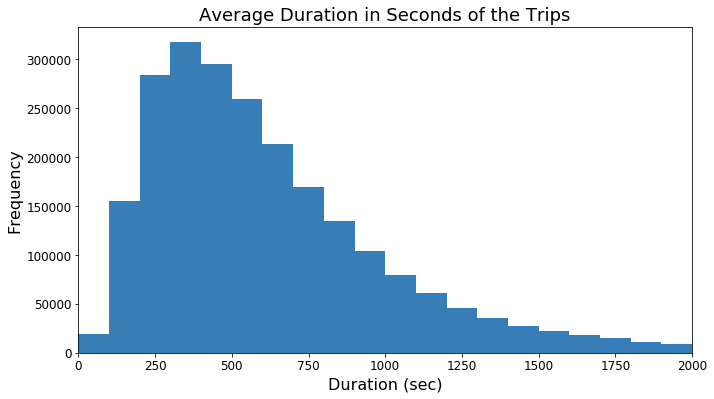

In [38]:
bins_edge = np.arange(0, master_df.duration_sec.max()+100, 100)

plt.hist(data=master_df, x='duration_sec', bins=bins_edge, color='#377eb8')
plt.xlim(0, 2000)
plt.xlabel('Duration (sec)')
plt.title('Average Duration in Seconds of the Trips')
plt.ylabel('Frequency');

## **Duration in Seconds of the Trips in Each Age Group**

- Most of the users have the age between 30-40, followed by 20-30, 40-50 and so on.

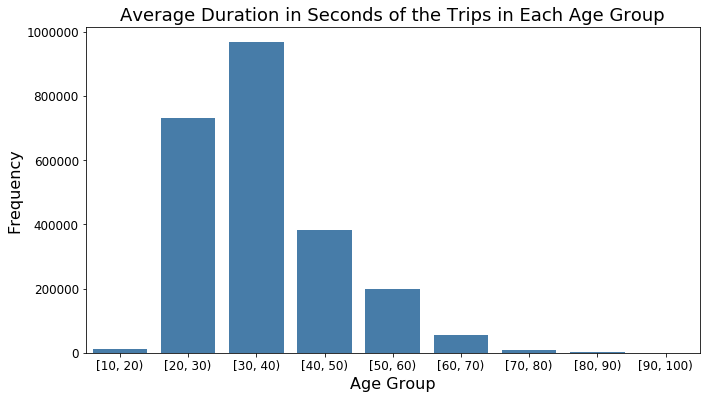

In [39]:
sb.countplot(master_df['age_range'], color='#377eb8')
plt.xlabel('Age Group')
plt.title('Average Duration in Seconds of the Trips in Each Age Group')
plt.ylabel('Frequency');

## **Frequency of User Type**

- There are much more subscriber than customer.

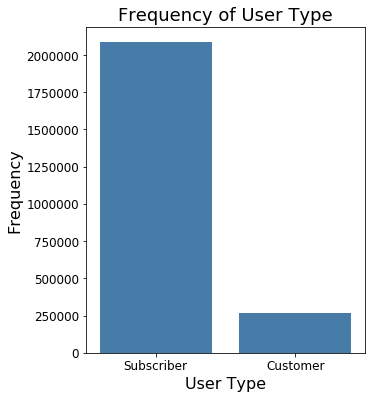

In [40]:
plt.subplot(1,2,1)
sb.countplot(master_df['user_type'], color='#377eb8')
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.title('Frequency of User Type');

## **Frequency of Gender Type**


- There are much more male than the others genders.

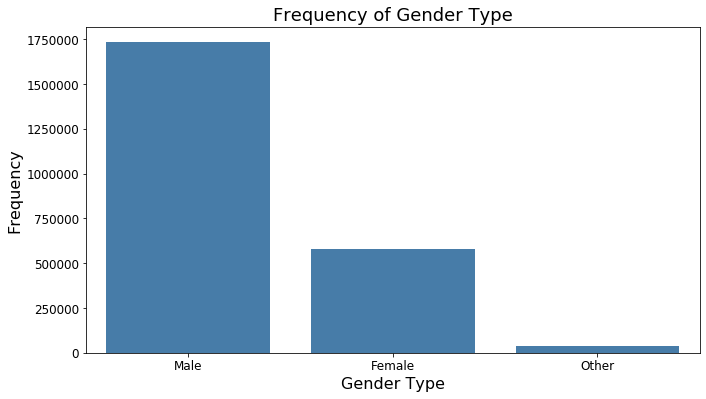

In [47]:
sb.countplot(master_df['member_gender'], color='#377eb8')
plt.xlabel('Gender Type')
plt.ylabel('Frequency')
plt.title('Frequency of Gender Type');

## **Frequency of Gender Type for Each User Type**

- The number of subscriber is much more than that of the customer. The male subscriber shows a very huge proportion of the total sample.

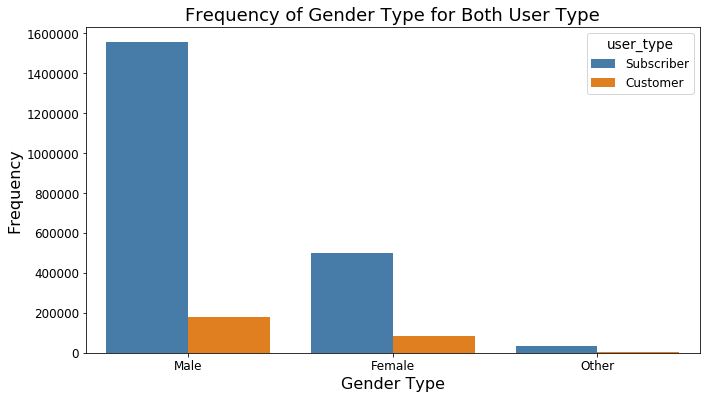

In [44]:
sb.countplot(data=master_df, x='member_gender', hue='user_type', palette=['#377eb8', '#ff7f00'])
plt.xlabel('Gender Type')
plt.ylabel('Frequency')
plt.title('Frequency of Gender Type for Both User Type');

## **Duration in Seconds X Gender Type**

- We can observe that duration of the trips in each gender are very different. In average, the duration of the trips in the male gender are lower in terms of seconds (about 730 sec, that is, 14 minutes aproximattely). In contrast, female gender use the trips for more time (about 875 sec, that is, 15 minutes aproximattely). Finally, others genders are about (875-925 sec, that is, 15-16 minutes).

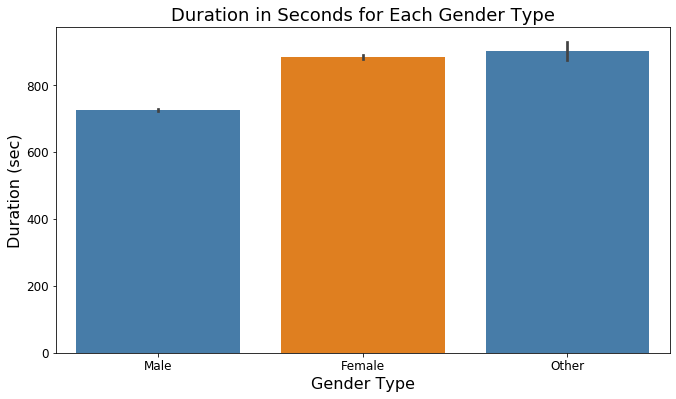

In [45]:
sb.barplot(data=master_df, x='member_gender', y='duration_sec', palette=['#377eb8', '#ff7f00'])
plt.xlabel('Gender Type')
plt.ylabel('Duration (sec)')
plt.title('Duration in Seconds for Each Gender Type');

## **Duration in Seconds for Each Month in the Year 2018 (All Months) and 2019 (Three months)**

- The months who have more duration in the trips are June, July (Highest), August and September.
- The months who have lower duration is the trips is November, December, January and Frebruary (Lowest).

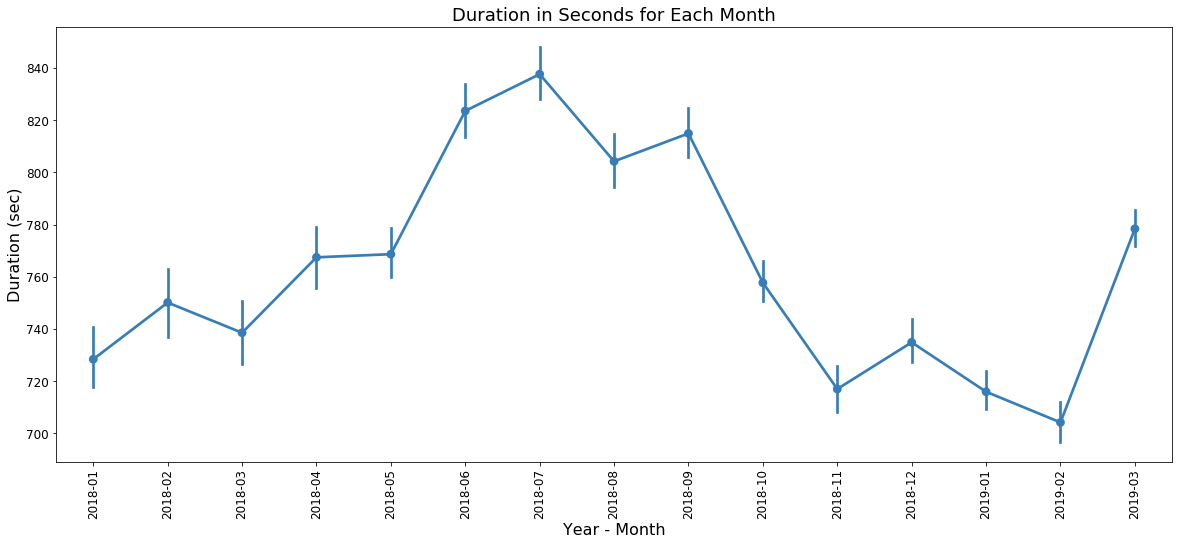

In [48]:
plt.figure(figsize=(20, 8))

sb.pointplot(data=master_df, x='month_year', y='duration_sec', color='#377eb8')
plt.xticks(rotation=90)
plt.xlabel('Year - Month')
plt.ylabel('Duration (sec)')
plt.title('Duration in Seconds for Each Month');

## **Top 3 Stations to Start a High Duration Trip**

- Here we can observe the top 3 stations that users use to start a trip. We can observe the users who start in the station San Francisco Ferry Building (Harry Bridges Plaza) have more duration in the trip, the median of duration is about 650 seconds, that is, about 11 minutes. The other both stations have basically the same results, the median is about 530 seconds, that is, about 9 minutes.

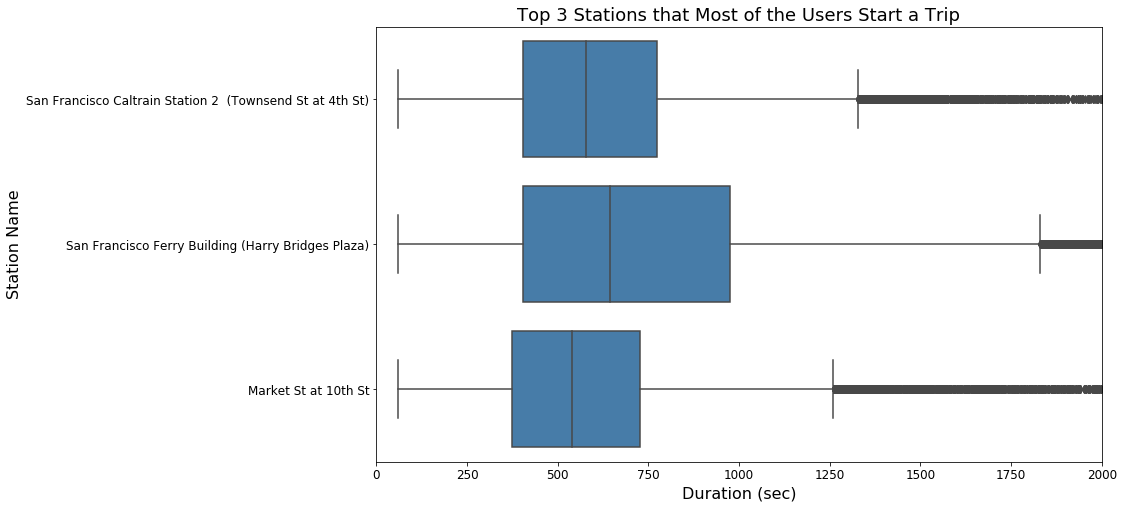

In [49]:
plt.figure(figsize = [13, 8])

sb.boxplot(data = master_df_top_3_stations, y = 'start_station_name', x = 'duration_sec', color = '#377eb8', orient="h")
plt.xlim(0, 2000)
plt.xlabel('Duration (sec)')
plt.ylabel('Station Name')
plt.title('Top 3 Stations that Most of the Users Start a Trip');

## **Duration in Seconds for Each Month in Both User Type**

- Here we can observe the trend of each type of user. Customers have more duration in the trips compare to the subscribers, the difference of duration in each month is more than twice. We have more variance in duration in the customers than in the subscribers.

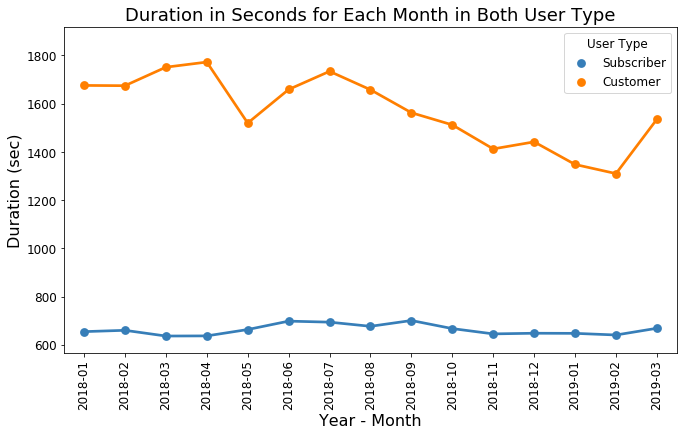

In [53]:
sb.pointplot(data=master_df, x='month_year', y='duration_sec', hue='user_type', palette=['#377eb8', '#ff7f00'], errwidth=0)
plt.xticks(rotation=90)
plt.legend(title='User Type')
plt.xlabel('Year - Month')
plt.ylabel('Duration (sec)')
plt.title('Duration in Seconds for Each Month in Both User Type');

## **Duration in Seconds for Each Month in Each Gender Type**

- In the gender analysis, the variance is more higher in all types of genders but in all of than we observe pratically the same trend for each month.

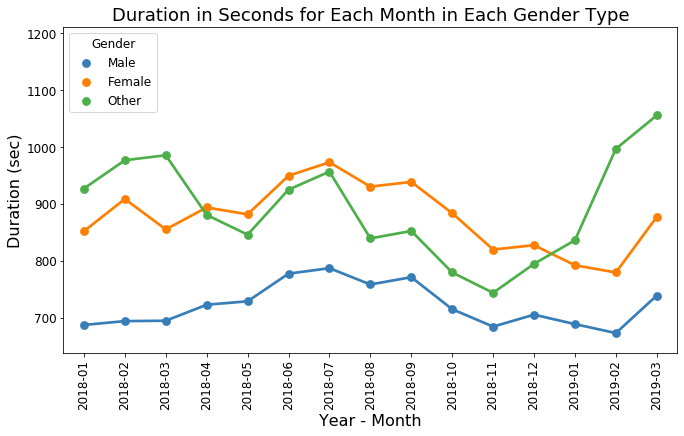

In [52]:
sb.pointplot(data=master_df, x='month_year', y='duration_sec', hue='member_gender', palette=['#377eb8', '#ff7f00', '#4daf4a'], errwidth=0)
plt.xticks(rotation=90)
plt.legend(title='Gender', loc=2)
plt.xlabel('Year - Month')
plt.ylabel('Duration (sec)')
plt.title('Duration in Seconds for Each Month in Each Gender Type');

## **Duration in Seconds for Each Age Group in Each Gender Type and Each User Type**

- We can observe that are more variance in the duration for each age range on the customer type in all genders than the subscriber type, except the gender 'other' in the subscriber type.
- For customers, the age range of 70-80 in the male gender have more duration on the trips. For female gender, the age range of 10-20 and 70-80 have more duration. Finally, in the other gende we have the age range of 50-60 that have more duration trip.

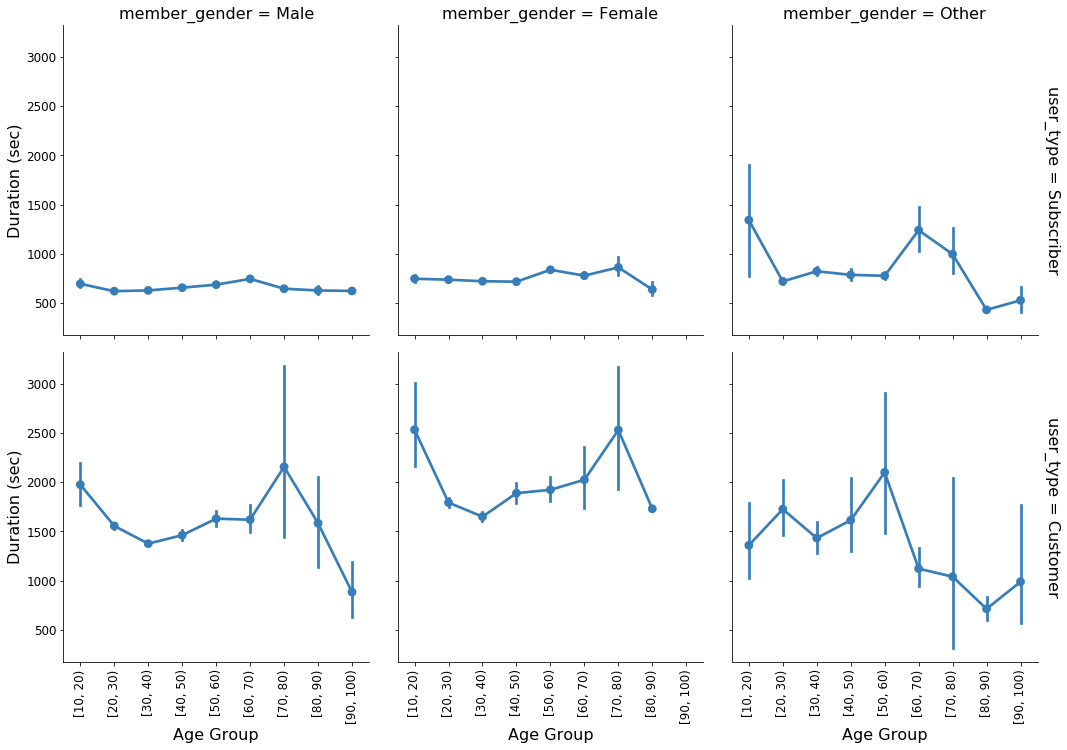

In [59]:
g = sb.FacetGrid(data = master_df, col = 'member_gender', row = 'user_type', size = 5,
                margin_titles = True)
g.map(sb.pointplot, 'age_range', 'duration_sec', color='#377eb8')
g.set_xticklabels(rotation=90)
g.set_xlabels('Age Group')
g.set_ylabels('Duration (sec)');

# **Conclusion**

- People are likely to use bikes for short-distance trips.
- Male gender use with more frequency, but the other and female gender has a higher duration than the male.
- There are a higher movimentation of the trips with higher duration in the months June, July (Highest), August and September. And a lower movimentation of the trips with lower duration in the months November, December, January and Frebruary (Lowest).
- The top 3 stations to start a trip with higher duration in order are:
    - San Francisco Ferry Building (Harry Bridges Plaza)
    - San Francisco Caltrain Station 2 (Townsend St at 4th St)
    - Market St at 10th St.
- Subscriber user type use with more frequency, but the customer user type has a higher duration than the subscribers in all months.

<!-- > Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation! -->